c:\Users\franc\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9289 - loss: 0.2449 - val_accuracy: 0.9615 - val_loss: 0.1296
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9682 - loss: 0.1038 - val_accuracy: 0.9718 - val_loss: 0.0890
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9765 - loss: 0.0750 - val_accuracy: 0.9740 - val_loss: 0.0788
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9819 - loss: 0.0569 - val_accuracy: 0.9702 - val_loss: 0.0951
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9853 - loss: 0.0464 - val_accuracy: 0.9768 - val_loss: 0.0810
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


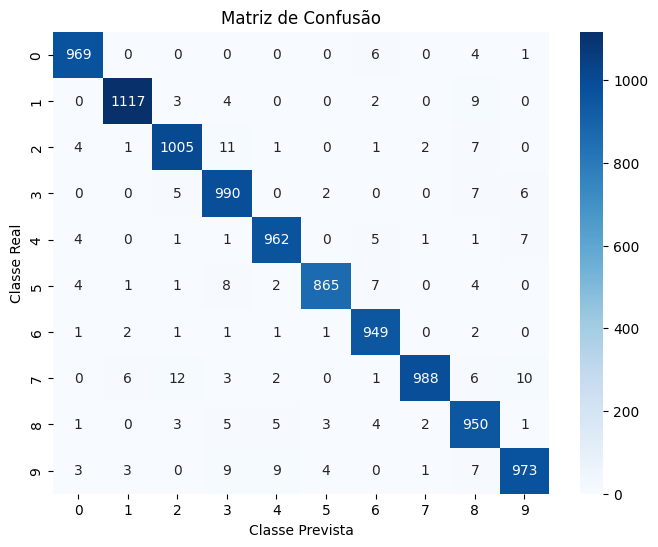

Dataset MNIST - Dígitos manuscritos


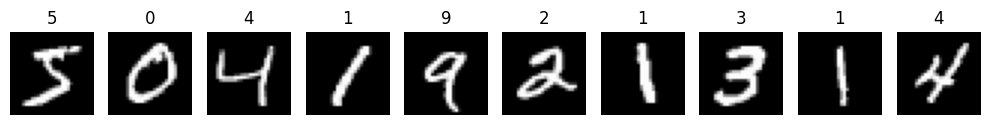

10 primeiras previsões:


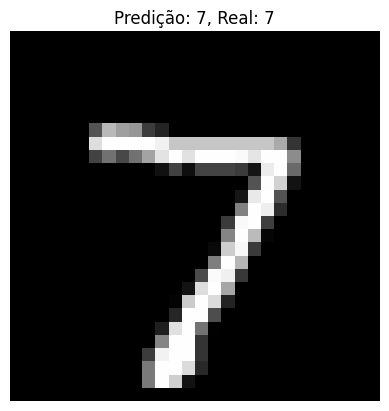

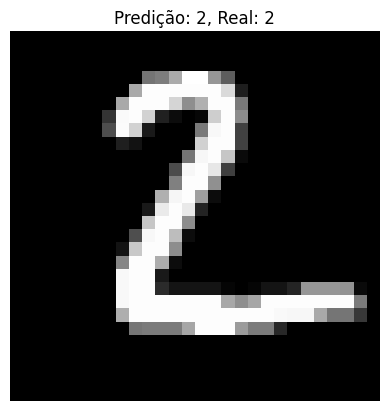

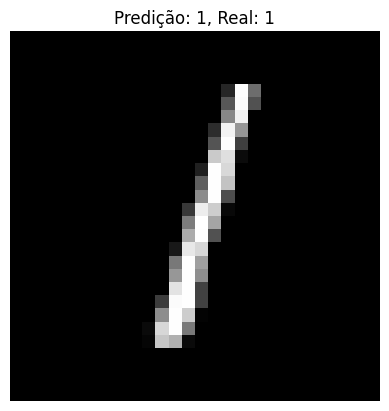

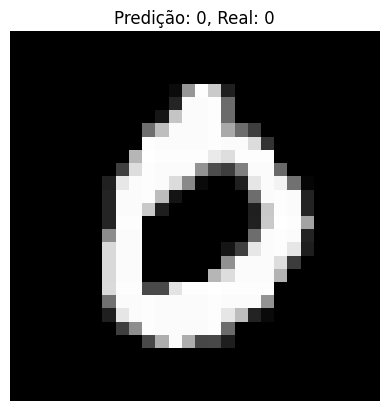

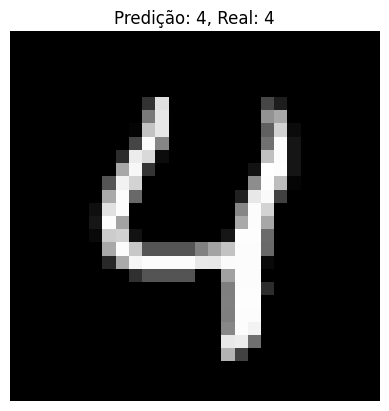

Matriz de valores de pixels da primeira imagem de teste:


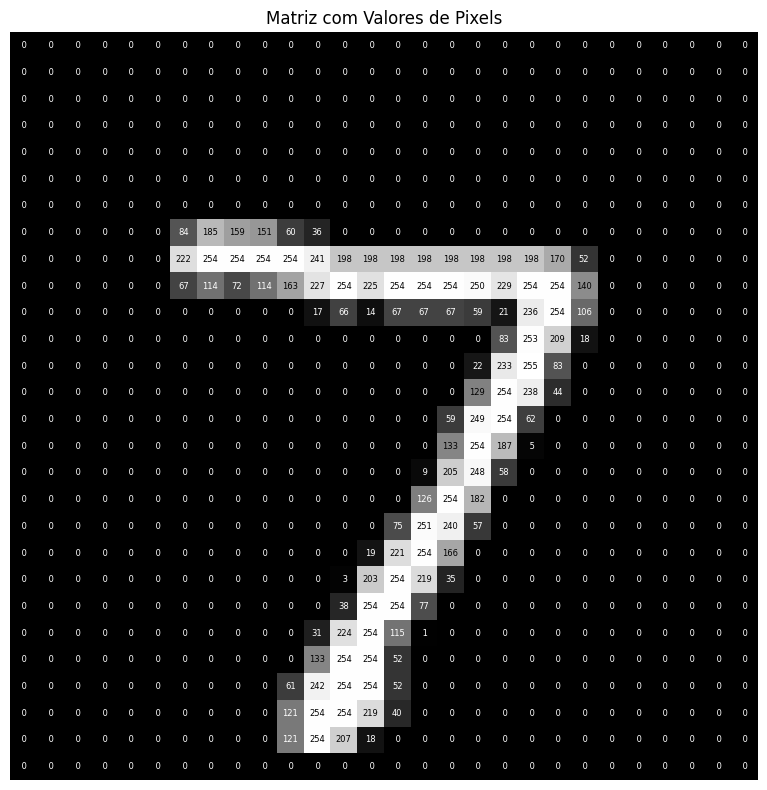

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


modelo = models.Sequential([  # Rede neural
    layers.Flatten(input_shape=(28, 28)), # - vetorizar as imagens 28x28 em um vetor de 784 elementos
    layers.Dense(128, activation='relu'), # - neurônios na camada oculta
    layers.Dense(64, activation='relu'), # - neurônios na camada oculta
    layers.Dense(10, activation='softmax') # - camada de saída com 10 classes (0-9)
])


modelo.compile(optimizer='adam', # - onde usa as derivadas para ajustar os pesos
               loss='sparse_categorical_crossentropy', # - função de perda
               metrics=['accuracy']) # - métrica de avaliação

modelo.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


previsao = modelo.predict(x_test) # - retorna probabilidades para cada classe
previsao_categoria = np.argmax(previsao, axis=1) # - converte probabilidades em classes previstas


matriz_confusao = confusion_matrix(y_test, previsao_categoria) # - matriz de confusão
acuracia = accuracy_score(y_test, previsao_categoria) # - acurácia do modelo

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Matriz de Confusão")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

print("Dataset MNIST - Dígitos manuscritos")
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')  
    plt.title(y_train[i])
    plt.axis('off') 
plt.tight_layout()
plt.show()

print("10 primeiras previsões:")
for i in range(5):
    plt.title(f"Predição: {previsao_categoria[i]}, Real: {y_test[i]}, Acurácia: {acuracia:.2f}")
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.show()

print("Matriz de valores de pixels da primeira imagem de teste:")
plt.figure(figsize=(8, 8))
plt.imshow(x_test[0], cmap='gray')
plt.title('Matriz com Valores de Pixels')
plt.axis('off')
linhas, colunas = x_test[0].shape
for i in range(linhas):
    for j in range(colunas):
        valor = x_test[0][i, j] * 255 # Escala de 0 a 255
        cor_texto = 'white' if valor < 128 else 'black'
        plt.text(j, i, f'{valor:2.0f}', ha='center', va='center', color=cor_texto, fontsize=6)

plt.tight_layout()
plt.show()



## BLIBLIOTECAS


In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## MODELO DE REDE NEURAL


In [ ]:
modelo = models.Sequential([  # Rede neural
    layers.Flatten(input_shape=(28, 28)), # - vetorizar as imagens 28x28 em um vetor de 784 elementos
    layers.Dense(128, activation='relu'), # - neurônios na camada oculta
    layers.Dense(64, activation='relu'), # - neurônios na camada oculta
    layers.Dense(10, activation='softmax') # - camada de saída com 10 classes (0-9)
])


modelo.compile(optimizer='adam', # - onde usa as derivadas para ajustar os pesos
               loss='sparse_categorical_crossentropy', # - função de perda
               metrics=['accuracy']) # - métrica de avaliação


c:\Users\franc\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential, built=True>

## EXIBINDO A ARQUITETURA DA REDE NEURAL CNN 


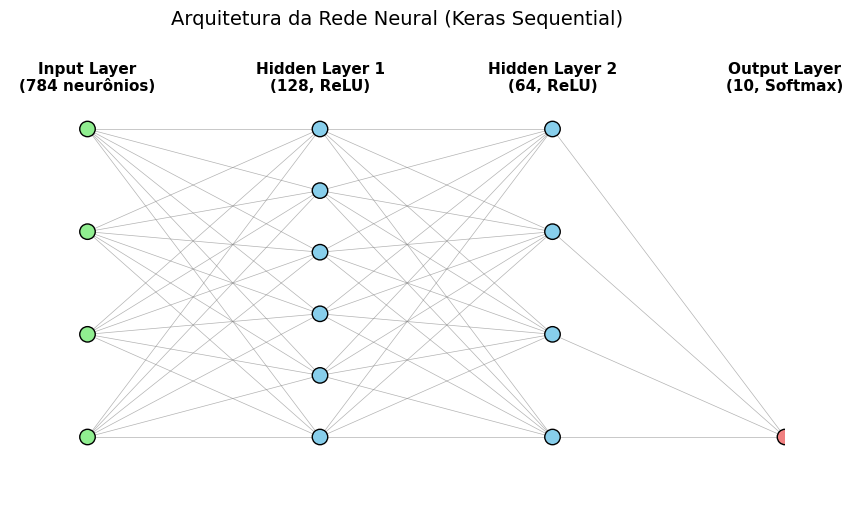

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers

# === Definir o modelo exatamente como o seu ===
modelo = models.Sequential([
    layers.Flatten(input_shape=(28, 28), name='Input'),
    layers.Dense(128, activation='relu', name='Hidden_1'),
    layers.Dense(64, activation='relu', name='Hidden_2'),
    layers.Dense(10, activation='softmax', name='Output')
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# === Funções auxiliares para desenhar o diagrama ===
def draw_layer(ax, n_neurons, layer_x, color, label):
    """Desenha uma camada de n_neurons em x=layer_x"""
    y_positions = np.linspace(-1, 1, n_neurons)
    for y in y_positions:
        circle = plt.Circle((layer_x, y), 0.05, color=color, ec='black', zorder=3)
        ax.add_artist(circle)
    ax.text(layer_x, 1.25, label, ha='center', fontsize=11, fontweight='bold')
    return y_positions

def connect_layers(ax, x1, y1, x2, y2):
    """Conecta todos os neurônios entre duas camadas"""
    for y_start in y1:
        for y_end in y2:
            ax.plot([x1, x2], [y_start, y_end], color='gray', lw=0.5, alpha=0.6, zorder=1)

# === Criação do gráfico ===
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
ax.set_xlim(0, 5)
ax.set_ylim(-1.5, 1.5)
plt.title("Arquitetura da Rede Neural (Keras Sequential)", fontsize=14, pad=20)

# === Desenhar as camadas ===
x_positions = [0.5, 2.0, 3.5, 5.0]
colors = ['lightgreen', 'skyblue', 'skyblue', 'lightcoral']
labels = ['Input Layer\n(784 neurônios)',
          'Hidden Layer 1\n(128, ReLU)',
          'Hidden Layer 2\n(64, ReLU)',
          'Output Layer\n(10, Softmax)']

neurons = [4, 6, 4, 1]  # número reduzido só para visualização

layers_y = []
for x, n, color, label in zip(x_positions, neurons, colors, labels):
    y_pos = draw_layer(ax, n, x, color, label)
    layers_y.append(y_pos)

# === Conectar camadas ===
for i in range(len(layers_y)-1):
    connect_layers(ax, x_positions[i], layers_y[i], x_positions[i+1], layers_y[i+1])

plt.show()


## TREINAMENTO E PREDIÇÂO

In [ ]:
modelo.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

previsao = modelo.predict(x_test) # - retorna probabilidades para cada classe
previsao_categoria = np.argmax(previsao, axis=1) # - converte probabilidades em classes previstas

## ACURACIA E MATRIZ DE CONFUSÂO

In [ ]:
matriz_confusao = confusion_matrix(y_test, previsao_categoria) # - matriz de confusão

acuracia = accuracy_score(y_test, previsao_categoria) # - acurácia do modelo

## COMPILAÇÂO

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
C:\Users\franc\AppData\Local\Temp\ipykernel_6096\3767793431.py:28: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Matriz com Valores de Pixe\s')


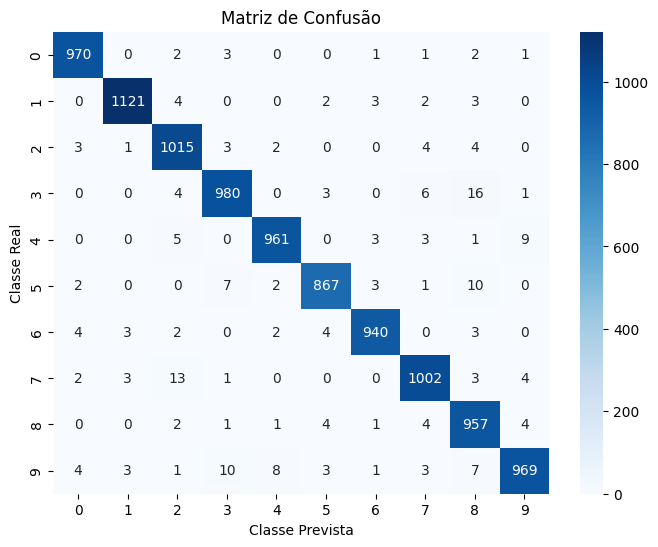

Dataset MNIST - Dígitos manuscritos


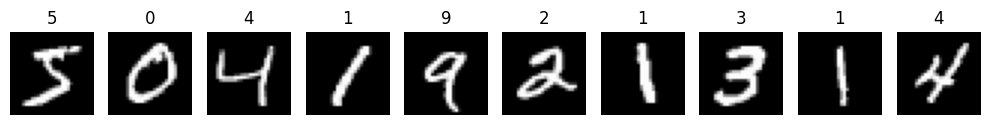

10 primeiras previsões:


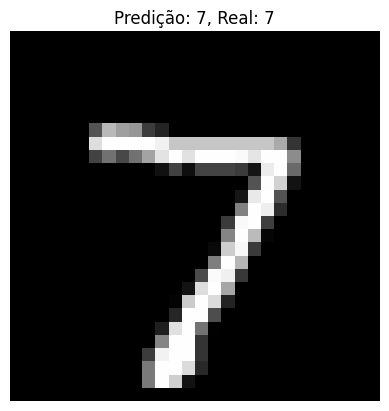

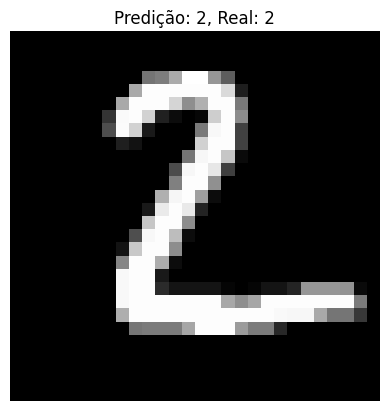

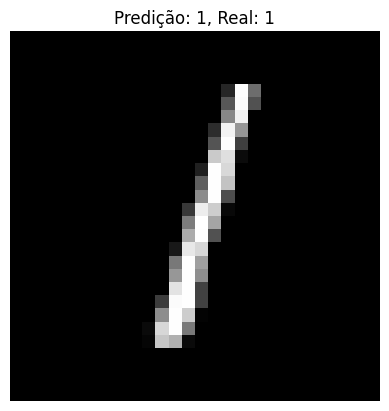

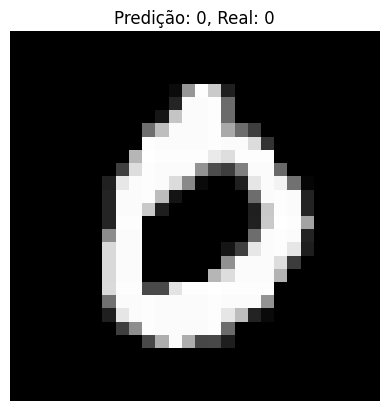

Matriz de valores de pixels da primeira imagem de teste:


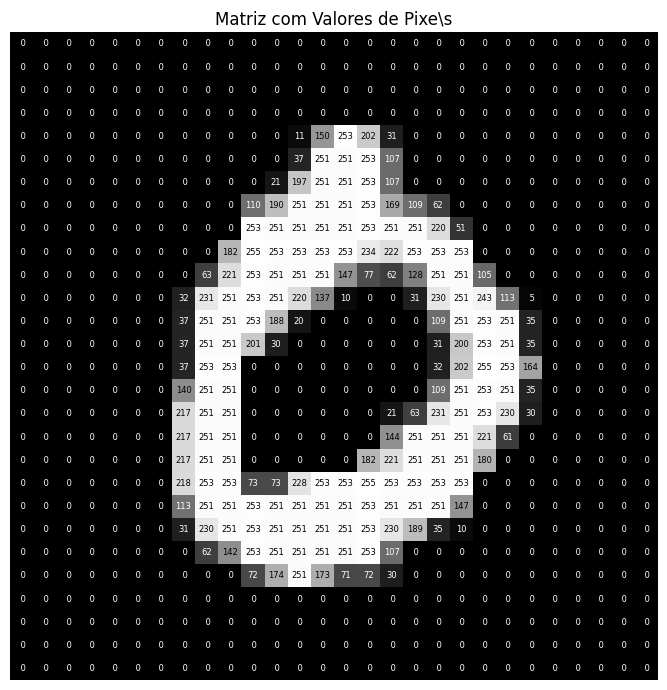

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Matriz de Confusão")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

print("Dataset MNIST - Dígitos manuscritos")
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')  
    plt.title(y_train[i])
    plt.axis('off') 
plt.tight_layout()
plt.show()

print("10 primeiras previsões:")
for i in range(4):
    plt.title(f"Predição: {previsao_categoria[i]}, Real: {y_test[i]}")
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.show()

print("Matriz de valores de pixels da primeira imagem de teste:")
plt.figure(figsize=(7, 7))
plt.imshow(x_test[3], cmap='gray')
plt.title('Matriz com Valores de Pixe\s')
plt.axis('off')
linhas, colunas = x_test[3].shape
for i in range(linhas):
    for j in range(colunas):
        valor = x_test[3][i, j] * 255
        cor_texto = 'white' if valor < 128 else 'black'  
        plt.text(j, i, f'{valor:2.0f}', ha='center', va='center', color=cor_texto, fontsize=6)

plt.tight_layout()
plt.show()


## DERIVADAS

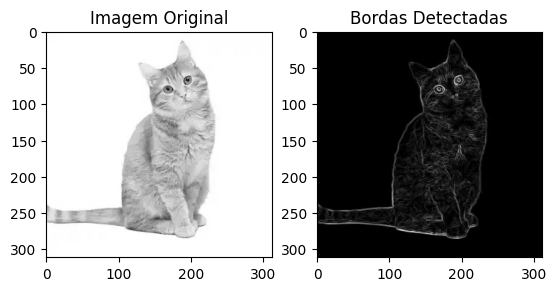

In [33]:
import cv2
import numpy as np
import base64
import io
from PIL import Image

# Aqui vai a sua string base64 da imagem
image_base64 = 'data:image/webp;base64,UklGRhoPAABXRUJQVlA4IA4PAAAQZQCdASo4ATgBPtlqrlEoJiQiplQZaQAbCWVu4XVQ4iL9h1ydZHqF/Pvft2sr2/yfd4/t+d3upnFhGGIF/O//Xg6jpr+SeumycBBXsnadNyFMzMzMr0hKz/Bxj7tfyJY9hDu/kKZaPc6pWDIWpfncONcJ6jq3vGA4Ewgaja/knnHAV3e/TH5xYNKQMVUMHoyo9dTZV4U1Gliokzt+fJAIW47sspmZmZmZXL38dTYDTsMtgq8F7s8noOzdKl1hj5IXxVZ8FWvALnrKAZMlznmJIS/knrptOuCZttPiqh4rYtsjAqLA7wsZ7E6hKlcC1By8kViGEQ6baUQUbX8k9dNnDXtXP7i6GC7sxSSreakDWB5sy2SzVhPPJNEo7C5QDw0s2v5J66bN1VYXxEN8XBeFchq7UgmOtznF3qgDKFIl73LVqf1vicFfknrptNsHaUtppVI68Qsy9kb/N27MBYqKalKJuhO8DVvnfHVvV+oNlFMm1yQy5QPyqpGEJ1EesAO3XICC+wFKkTR2KLlgukx9/0GdYX+O39zT5XJEosncHOI21G1++xDdyLqw2xizsBiFc6xaDUItB1Z+nZ0jWR3L7WsxhTE5IOYRJ106bkJdUzrjaniJlJP0LYlYOJRsuNmNPqynGvCkUMbg7L7BN4MHRc4J+VVVVVSGeDYQEXczbw090hgBdHs+VXi9Nm/nvfmKBcxFYG0xq+f7pTC8KQpmZmZXrFC2sg7IZpRJFcEd/T4HgLHUB/BHEybc97H9OZJYNUGoddRNJ0Dsj92nRe4UGSpxQnf8uy09bwxFz7XKapslLqzObkNhAfEGkGjrnndOdDIzKaDODQEhCXkqXSntk8ENbnaQto8b1P+oPSsfrQw10mSqB42Ea0qwhU77v3iwXz1+BAziYrQlQatDXBscJxawk9a5D1CCDQP5DY0BSEJH1YGjxogKlYBj38IFQFAnlqwZ1pa6MnCXEz4VvoaZUHrU6yadKq0c2eqnIf0LqaFj+cJfyT2hhoXy0asymsYJVfrpRF2TM+uefPa6y0QqmFXmhnTxVeZXNr+Seum6V2XRYflVVVVVVVVVVVVVVUIAAP7/KvVAJGW7J2QiK0hynw7wDjVNzZG1BtQbUG1BtPyAmX47kclveTEXzA7groJqwJ7TjxbAy7TgCeEFhACowpguWV2MCpsIUKe0goZ1q9qx8McSKPyDyeIbv9PIU05oVd3DHTJOBuZd/CR4HVLsa44ZcIWyr+L1qWTSP9YoKXJNMU58sayLgACMfAKplSxJ5ipMesbP1kMzTkA75691exOEyK3LeFgipQ1/TY/5R4bNEthSQSVAjTfzEkyYn8PcvwC/sWZpnijyYsEQY+LmkMfepb93sZPVmS6dlWNnc7+1ECxKbbl/zqGTeIzEZbBuiu6PtWf3bvIjrMLxMd2ZNqAMgSSiUTkiyU1wtQPQHrC/a6pgp64IF/0ny07gAFbJWqCyHw0S0+BqX84qtaEys6vSd3iuiseyeWlKHhWIUSPRUUcDZjlkT+Y/5hAm+AQAHcS5phTCD30EMRYTHBDj80UBzT8KRAVdNHkoarq+aHzoarg6f9e/J8e+kjM0WuSwLgViVY4VvDbVUZ6sHcwXGHt6Avbea2bb9IuCvZgGEFDtoRFfpeHfyEAOgN+PzZustNZpdqfGPdaMDB1EYQ5ASHfUn9a7j8nm4Ft6gTbem08Sn9cc/VH/kdJDLbxy9VyDeml3rGrF269RUCTwALNINgXigSR3O54wjYBL9qdeIhYhqhDLlzEFZg8+OC+KthkW/qUPi7KkZVisT1rE4bn1Mh9Pq5ZNRSQ7H2beFWg8dWQqpyrCr2IMt/KvKHrzKxRZQiDshQiW194jIx8AppCF65D5/CZk3p4b+zxDPrUS+qBkcNis0pEdkDjGBhrc8CZUoz+uBgSH2U8dm62HL+4jVi1clbCb6y4s3eJox4IvXNnYdJj/Bfo8X8o2lYIz9HzQCUfOP6JALkSOxdPlblquXtLi2hYOmAJoJdrS7MiLnoItZ9Xi+bUuCDNc09jiy9buJtbCc5GTvwpM5BA8kb8Wp1Ru4H0RUXHTzwzydkYz6DJ16o5PnmwAMCBMvjKYQmncgqe61YnZCSUHEhLiUzoW2HAhNe/2CWeekWSlj8aH7KWRINKNqLbqF6wrxTj47dcagJ9iXt4+uMAFkxvYAhRPTuzpiTiXYXDUO/86d90j8Mg0X3gnLvtWfRty6Oz7uJ8dWK0JlskHduAD9n0ihylCZ4U5gqeHplSo51HDHOhMVmSuMK8CeEQ8SA8R9KioAcdQwbx+Dyhv1B7ytZHHotnnbPy+Ppni2OEhTlBtpOiJiCePgjAWQBP/s4NVV57pktUfsQG2iurm4ggYyHAkx2SLYBZnZICeUyX1vphT4LYxFReNHiwEGxb2kUu+SC6PJsKFNxSzJl8uczYc64UZDPeV+Aa3sG6DY7PdZ8wAveJgs8BZybuObOV7fSmMMBKhOCnjquU6b0oKi5qcLwX3kV2pH1vS/deLIB34+CmIpq2WvZZA3pOAj3niVAdM7sP/8XnGpXTkN19sjA1BG2aO/1j4odwsg86oi4r4bO7YtOujFOlQ73S64JxskjcdDbAP6bB+ymEehvOATI76O3CXRe8DftvIACO6tTAV05uE6djfd8ipT7Yafyi2SmPN2vusEzO/jkf7y6s9P7Vpj4Nm7HgbYxt8tC8VarYhXl3kjGiE7/U2sZrngV3Gv0L0SklbIKxwux40u0z4/cSq46abTOuORSlGue0ZDpgqYpyu/FryEeCq27RM2uqdR1d3h9Y1/CEh0IEPMt1GvfD6pQTz+DBDFmGXt/LXHVZNEZOoUgktI3XdyUStbSlBnNPXIwmhASQCARH2Yo3f66GK1OxgA0drpu/FhGIQ83eCLh+KrYX5V23Rv8BmPE9KMYMi8Zg8tRKS6Y92bktWW1UHLkTzCDhvnGYxKLUdju8xentw95qsnN21+D5lC6zutaYjslhQ+ScAsmI2kUTnhCFs4kii1PfHmZQJp8KDDc/eJeghOfbWFDjfNhUIEaCyFUj+uOyA1zjrvP6JZ5EzyMwu3RYUCyicWFHAUksfQdZJ60A9zqbjpfptFLwms8G+JknYDb+sxdO6NCk7aVopGX9Zd0uYcgfcjKd/32InKYALCC77t2sidpZcFEoerQhQssXpI0MfFEhmaIScRg918ODf8gOe/y6teQQ076tVXyvwXkMrq6QQaK+U7s3X0GNFKFOoaQA6VnKT+dwnwd4BmRVQ/kFFjfOrDSo0NIEUDk9vWK3TkaGLmSXXVRrqM7CYblozbQ36MhnsPdajgtItEUBTR9mZoGqz9rZTjgYzDL7Z8Y47BoW9OxSe/EUScNC3lj6AbyCgieMQOZ+jsTzio1tD54fAnES5LioqpKk0PAUG/jnkgFL7mTspa8siEKbHJU6HhpkNMYWUStXLOPHphJ5YTDlisYrScWAwehjvFdiYbn+fzveGA9929fTB5iINVbAvb8LOYoLkmPS/mcVBHIo0NqLxl6kcDZSXTU+lkMHLIlxCgGWlnaBrR7Ic9+ry7ZrgG2pbNHToI5vzZYlZZDIJWy+Rzf1C3Rlo6LpbNdruXs9z8HU3MfYU0v8QApJFcSMD1arWJcDqxsvlBBk1U2y2Iio/cQpVk9cc9qsMJLzv4VzaHELyIxnVk3uExBG0KY3yAbBccjM8pWREeu5l2/Xy/U5k9EM+r1kntORK4MDEpnOPSlApVDxExUWQzNWqj2YLAyS8jNPmDscs3kg8/ap+8sg7rdUZ2+LqIFhZgBnOP+03GffQ52vCJJ02o7Y2Z8BpMzCKd/eV4vVlzFMVZlhZUcpB4KXFch5zBAXHwJAumIpOP2rTj7aE1DdPU5iFEGOWLbbHP/fPJdYTdsQNEGFk2vVEDJbNuGBLmluRFaIGiQx4O6XsfhPUsHCJS0uMx5O1aN/V7gVYAVViG/OiZW+c8D3wy6szWmkmKixUVf7SQPKgnF+mnY9ZVJRFL5ettda2x2r1wyfds8Gfis/CCRzxk2IVD+kk6QiVLdBYw1PVWDzcMQ3AbQsNLvRgOwja8bEIzsGiwY129Fn/TlJIXzfNBRCpCHD9txjkZU0DhVVQGyIn1EdJiHzetVJWAa1tzVuonwbr80gT7lxfGUizjMO6sHJDrk9/YVFhEFKq3SaOVKeEJFaEqZjOTNT342tckGXeu6LuF6/nvhUhPLu4HIP6vY2Y2Q1vhcqSkGF8GbD1bysDj1pER/s7hyst5fk0hPE9sjyJPjBWZoqdVIMCh1wrIwoy22KrFEjuNxXLk/XR7/rLgIw1Y3cjXWlTn+qSCGULo3r+aWNEwhio8dwbwBzJ8hhKFI3bggqa9mvVFw4tSnQDgmhcOEKOsxR3MQVC4C4KOf6nPUHtlU6cGsbyTSuXOfNQIO8yDXCW9ORP4nubn5NU9jVXAasBYvWIcgj9pRqfn1Aj431/EelX/AIRmDwpawpPGAa7KCYv3OzUaPDKueIxe70VfHqSxYzVkJ0JEkvKWPMajl7bLa+Wa77vj1AIq3OPPoJG4PD+uzaf9Ba2FNI4OeBLZeSwKrkKbR7ZJZz/vGlTivrSbY/RbgUdF2UsVxLfzAQiHVcywCU00vNe6i0SGNL8w0cn0EzZEFD3p5glcCH4VXT8Nc25okxyekdOuA7yHYrK17bqO5iTkWuH29zxmp37cOgaVpWOiQ7uhVivK1LIHIuJ7LouUizQLMUgSu1VshqhbPM45pCH6Or6UeGH3WE3UF5we+3DvsZ/1HdbwaNGIiG8y7Kf2LTv10IYRu0CTdAHN2h+N/b5fo1XBo9UVuPP8R+tZaBhkYSiDxp3wU4h5+ozW2Fs3e587csWPY1fcg1QOJkj81sqLem4QQO7RQIdNKvcUk3dbPt/pb6pjOJauO/VMif+5DBZd4l9xisv8l9JUNeQTlzVxPiINtyIabkbys1oleGMfN8XFUyVhhJeh5bSCQlilW2po/0ocMN2bJt0ntqxqYGNAk52e7y1na9mg85PSWxhEBRmcbalwLLPlVQQJdD9WUYbjezTNYI+Bo1d3ZAiDg5YbPjCIc+NQV2oNmpWPGV8Wi2424fDHACisYYlKHEAAAAAIeWKjAAAAA=='

# Remover a parte do prefixo 'data:image/webp;base64,' antes de decodificar
image_base64 = image_base64.split(',')[1]

# Decodificar o base64 para uma imagem
image_data = base64.b64decode(image_base64)
image_array = np.frombuffer(image_data, dtype=np.uint8)

# Carregar a imagem com OpenCV
imagem = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print("Erro ao carregar a imagem")
else:
    # Aplicar o filtro Sobel para detectar bordas
    sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)  # Derivada no eixo X
    sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)  # Derivada no eixo Y

    # Calcular a magnitude da borda
    magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Mostrar a imagem original e a imagem com bordas detectadas
    plt.subplot(1, 2, 1)
    plt.imshow(imagem, cmap='gray')
    plt.title('Imagem Original')

    plt.subplot(1, 2, 2)
    plt.imshow(magnitude, cmap='gray')
    plt.title('Bordas Detectadas')

    plt.show()


## LIMITES

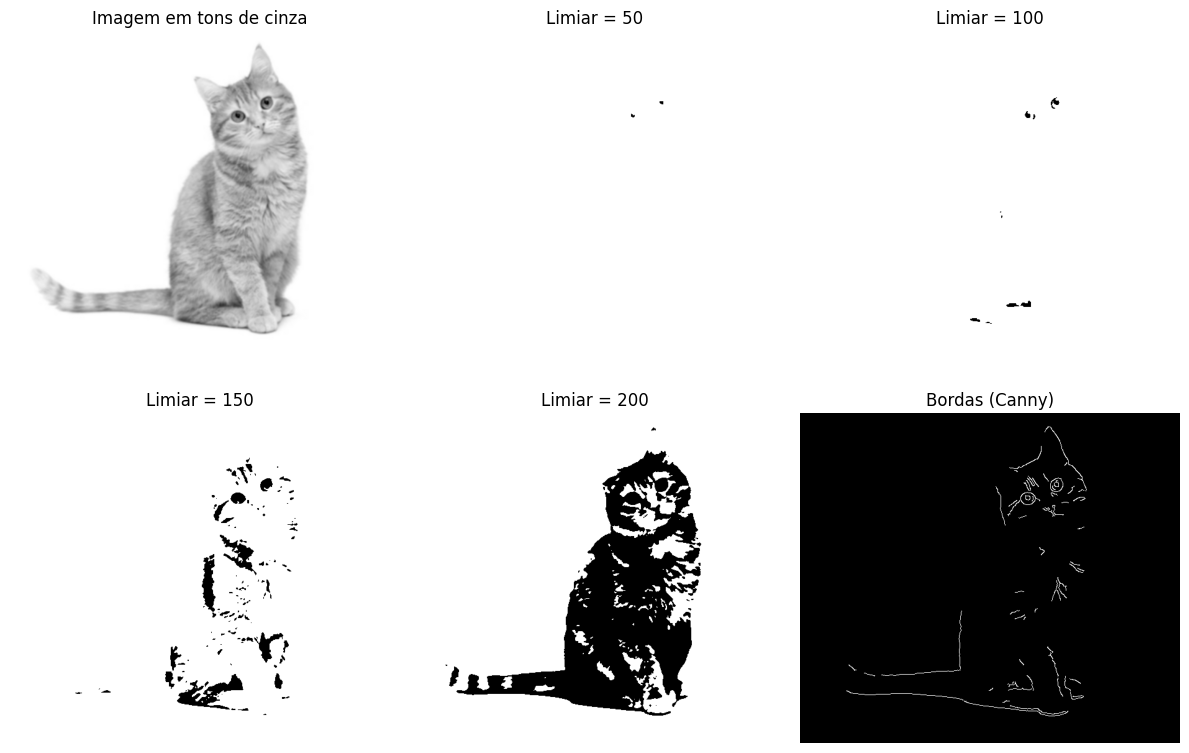

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# === 1. Carregar a imagem com segurança ===
imagem_path = 'gato.jpg'  # coloque o nome/caminho da sua imagem aqui

# Verifica se o arquivo existe
if not os.path.exists(imagem_path):
    print(f"❌ Erro: imagem não encontrada em {os.path.abspath(imagem_path)}")
    exit()

# Lê a imagem
imagem = cv2.imread(imagem_path)
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# === 2. Aplicar suavização (opcional) ===
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# === 3. Aplicar vários limiares (thresholds) ===
# Cada valor de limiar gera uma imagem binária diferente
threshold_values = [50, 100, 150, 200]
thresh_images = []
for t in threshold_values:
    _, th = cv2.threshold(gray, t, 255, cv2.THRESH_BINARY)
    thresh_images.append(th)

# === 4. Aplicar detecção de bordas (Canny) para comparação ===
edges = cv2.Canny(gray, 100, 200)

# === 5. Exibir resultados ===
plt.figure(figsize=(12, 8))

# Original em cinza
plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Imagem em tons de cinza')
plt.axis('off')

# Mostra os limiares diferentes
for i, (t, img_th) in enumerate(zip(threshold_values, thresh_images)):
    plt.subplot(2, 3, i + 2)
    plt.imshow(img_th, cmap='gray')
    plt.title(f'Limiar = {t}')
    plt.axis('off')

# Exibe bordas (Canny)
plt.subplot(2, 3, 6)
plt.imshow(edges, cmap='gray')
plt.title('Bordas (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()
